## 1. Problem Definition
The problem is a **binary classification** 

Using a number of differnet **features** (pieces of information) about a person, I intend to predict whether they have heart disease or not.

In a statement,

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the [Cleveland database](https://archive.ics.uci.edu/ml/datasets/heart+Disease) from UCI Machine Learning Repository.

Howevever, I have downloaded it in a formatted way from [Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci/).

The original database contains 76 attributes, but here only 14 attributes will be used. 


## 3. Evaluation

This is the evaluation metric that I thought to be appropriate 

> Reaching 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept will be paramount in pursuing this project.


### Heart Disease Data Dictionary

The following are the features I'll use to predict the target variable (heart disease or no heart disease).

1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

**Note:** No personal identifiable information (PPI) can be found in the dataset.



## Preparing tools

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score,plot_roc_curve

In [2]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


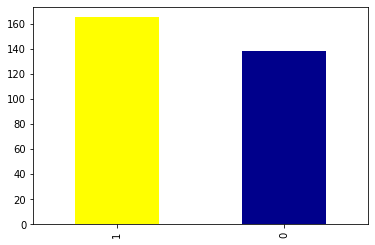

In [3]:
heart_disease["target"].value_counts().plot(kind='bar',color=["yellow","darkblue"]);

In [4]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
heart_disease.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

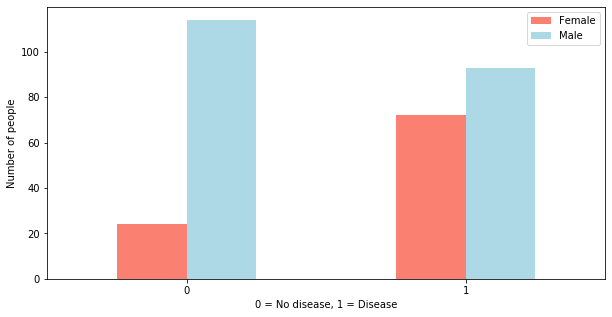

In [8]:
pd.crosstab(heart_disease.target,heart_disease.sex).plot(kind="bar",color=["salmon","lightblue"],figsize=(10,5));
plt.xlabel("0 = No disease, 1 = Disease")
plt.ylabel("Number of people")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);

[Text(0, 0.5, 'Max heart rate'),
 Text(0.5, 0, 'Age'),
 Text(0.5, 1.0, 'Without heart disease')]

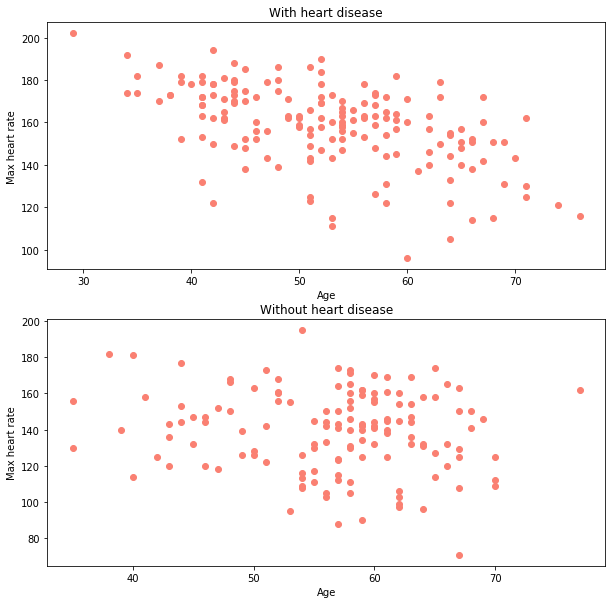

In [9]:
fig,(ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=(10,10))
ax1.scatter(heart_disease.age[heart_disease.target==1],heart_disease.thalach[heart_disease.target==1],c="salmon");
ax1.set(xlabel="Age",ylabel="Max heart rate",title="With heart disease")
ax2.scatter(heart_disease.age[heart_disease.target==0],heart_disease.thalach[heart_disease.target==0],c="salmon");
ax2.set(xlabel="Age",ylabel="Max heart rate",title="Without heart disease")



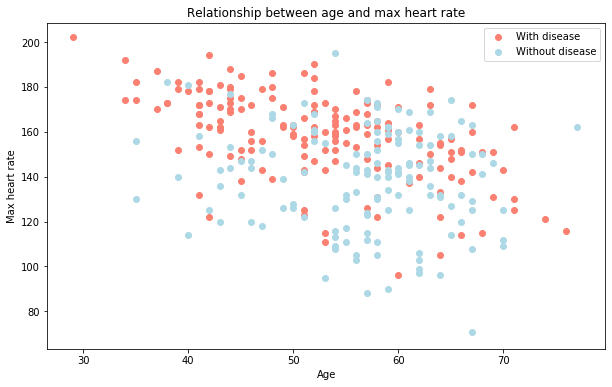

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(heart_disease.age[heart_disease.target==1],heart_disease.thalach[heart_disease.target==1],c="salmon");
plt.scatter(heart_disease.age[heart_disease.target==0],heart_disease.thalach[heart_disease.target==0],c="lightblue");
plt.xlabel("Age");
plt.ylabel("Max heart rate");
plt.title("Relationship between age and max heart rate");
plt.legend(["With disease","Without disease"]);

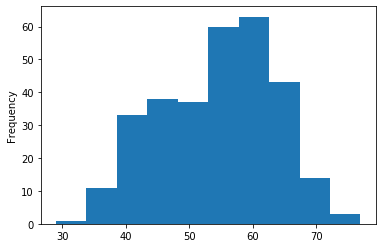

In [11]:
heart_disease.age.plot.hist();

In [12]:
pd.crosstab(heart_disease.cp,heart_disease.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


In [13]:
#correlation matrix
heart_disease.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


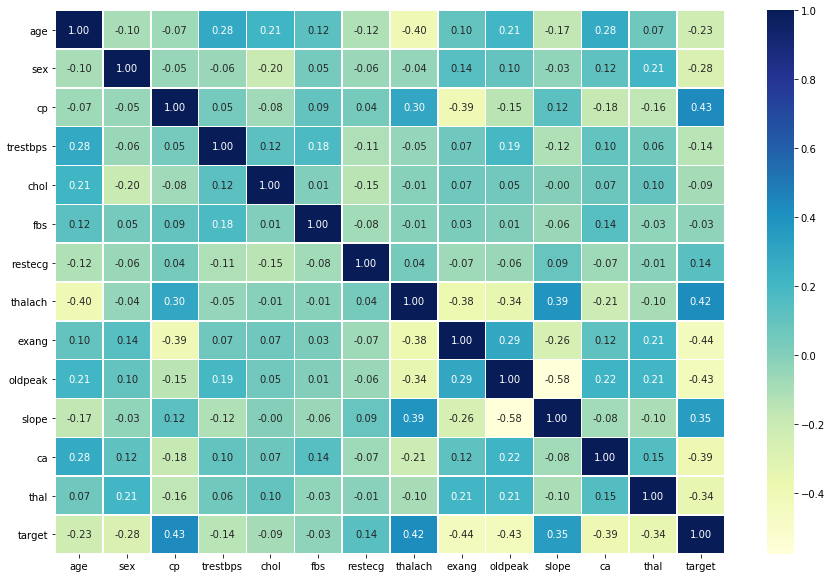

In [14]:
corr_matrix = heart_disease.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu")

In [15]:
np.random.seed(42)
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model = {"logistic_regression":LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Randomforestclassifier":RandomForestClassifier()}
results = {}

for model_name,model in model.items():
    model.fit(X_train,y_train)
    results[model_name] = model.score(X_test,y_test)

results

E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'logistic_regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Randomforestclassifier': 0.8524590163934426}

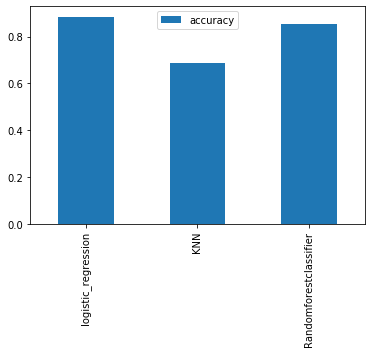

In [16]:
model_compare = pd.DataFrame(results,index=["accuracy"])
model_compare.T.plot.bar();

In [17]:
np.logspace(-5,0,30)

array([1.00000000e-05, 1.48735211e-05, 2.21221629e-05, 3.29034456e-05,
       4.89390092e-05, 7.27895384e-05, 1.08263673e-04, 1.61026203e-04,
       2.39502662e-04, 3.56224789e-04, 5.29831691e-04, 7.88046282e-04,
       1.17210230e-03, 1.74332882e-03, 2.59294380e-03, 3.85662042e-03,
       5.73615251e-03, 8.53167852e-03, 1.26896100e-02, 1.88739182e-02,
       2.80721620e-02, 4.17531894e-02, 6.21016942e-02, 9.23670857e-02,
       1.37382380e-01, 2.04335972e-01, 3.03919538e-01, 4.52035366e-01,
       6.72335754e-01, 1.00000000e+00])

In [18]:
parameters = {"solver":["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
              "C":np.logspace(-5,0,30),
               "penalty":['l1', 'l2', 'elasticnet', 'none']}

grid_search = RandomizedSearchCV(estimator=LogisticRegression(),
                                param_distributions=parameters,
                                n_iter=50,
                                cv=10,
                                verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV] solver=sag, penalty=l2, C=0.3039195382313201 ....................
[CV] ..... solver=sag, penalty=l2, C=0.3039195382313201, total=   0.1s
[CV] solver=sag, penalty=l2, C=0.3039195382313201 ....................
[CV] ..... solver=sag, penalty=l2, C=0.3039195382313201, total=   0.0s
[CV] solver=sag, penalty=l2, C=0.3039195382313201 ....................
[CV] ..... solver=sag, penalty=l2, C=0.3039195382313201, total=   0.0s
[CV] solver=sag, penalty=l2, C=0.3039195382313201 ....................
[CV] ..... solver=sag, penalty=l2, C=0.3039195382313201, total=   0.0s
[CV] solver=sag, penalty=l2, C=0.3039195382313201 ....................
[CV] ..... solver=sag, penalty=l2, C=0.3039195382313201, total=   0.0s
[CV] solver=sag, penalty=l2, C=0.3039195382313201 ....................
[CV] ..... solver=sag, penalty=l2, C=0.3039195382313201, total=   0.0s
[CV] solver=sag, penalty=l2, C=0.3039195382313201 ....................
[CV] ..... sol

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
E:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
E:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\anaconda\lib\site-packages\sklearn\l

[CV] .. solver=lbfgs, penalty=l1, C=0.09236708571873865, total=   0.0s
[CV] solver=lbfgs, penalty=l1, C=0.09236708571873865 .................
[CV] .. solver=lbfgs, penalty=l1, C=0.09236708571873865, total=   0.0s
[CV] solver=lbfgs, penalty=l1, C=0.09236708571873865 .................
[CV] .. solver=lbfgs, penalty=l1, C=0.09236708571873865, total=   0.0s
[CV] solver=lbfgs, penalty=l1, C=0.09236708571873865 .................
[CV] .. solver=lbfgs, penalty=l1, C=0.09236708571873865, total=   0.0s
[CV] solver=lbfgs, penalty=l1, C=0.09236708571873865 .................
[CV] .. solver=lbfgs, penalty=l1, C=0.09236708571873865, total=   0.0s
[CV] solver=lbfgs, penalty=l1, C=0.09236708571873865 .................
[CV] .. solver=lbfgs, penalty=l1, C=0.09236708571873865, total=   0.0s
[CV] solver=lbfgs, penalty=l1, C=0.09236708571873865 .................
[CV] .. solver=lbfgs, penalty=l1, C=0.09236708571873865, total=   0.0s
[CV] solver=sag, penalty=l2, C=0.06210169418915616 ...................
[CV] .

E:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] solver=liblinear, penalty=l2, C=0.0003562247890262444 ...........
[CV]  solver=liblinear, penalty=l2, C=0.0003562247890262444, total=   0.0s
[CV] solver=liblinear, penalty=l2, C=0.0003562247890262444 ...........
[CV]  solver=liblinear, penalty=l2, C=0.0003562247890262444, total=   0.0s
[CV] solver=liblinear, penalty=l2, C=0.0003562247890262444 ...........
[CV]  solver=liblinear, penalty=l2, C=0.0003562247890262444, total=   0.0s
[CV] solver=liblinear, penalty=l2, C=0.0003562247890262444 ...........
[CV]  solver=liblinear, penalty=l2, C=0.0003562247890262444, total=   0.0s
[CV] solver=sag, penalty=l1, C=0.00010826367338740541 ................
[CV] . solver=sag, penalty=l1, C=0.00010826367338740541, total=   0.0s
[CV] solver=sag, penalty=l1, C=0.00010826367338740541 ................
[CV] . solver=sag, penalty=l1, C=0.00010826367338740541, total=   0.0s
[CV] solver=sag, penalty=l1, C=0.00010826367338740541 ................
[CV] . solver=sag, penalty=l1, C=0.00010826367338740541, tota

E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940:

[CV]  solver=lbfgs, penalty=none, C=3.290344562312671e-05, total=   0.0s
[CV] solver=lbfgs, penalty=none, C=3.290344562312671e-05 .............
[CV]  solver=lbfgs, penalty=none, C=3.290344562312671e-05, total=   0.0s
[CV] solver=lbfgs, penalty=none, C=3.290344562312671e-05 .............
[CV]  solver=lbfgs, penalty=none, C=3.290344562312671e-05, total=   0.0s
[CV] solver=liblinear, penalty=l1, C=0.3039195382313201 ..............
[CV]  solver=liblinear, penalty=l1, C=0.3039195382313201, total=   0.0s
[CV] solver=liblinear, penalty=l1, C=0.3039195382313201 ..............
[CV]  solver=liblinear, penalty=l1, C=0.3039195382313201, total=   0.0s
[CV] solver=liblinear, penalty=l1, C=0.3039195382313201 ..............
[CV]  solver=liblinear, penalty=l1, C=0.3039195382313201, total=   0.0s
[CV] solver=liblinear, penalty=l1, C=0.3039195382313201 ..............
[CV]  solver=liblinear, penalty=l1, C=0.3039195382313201, total=   0.0s
[CV] solver=liblinear, penalty=l1, C=0.3039195382313201 ...........

E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elas


[CV] solver=newton-cg, penalty=l1, C=0.0002395026619987486 ...........
[CV]  solver=newton-cg, penalty=l1, C=0.0002395026619987486, total=   0.0s
[CV] solver=newton-cg, penalty=l1, C=0.0002395026619987486 ...........
[CV]  solver=newton-cg, penalty=l1, C=0.0002395026619987486, total=   0.0s
[CV] solver=newton-cg, penalty=l1, C=0.0002395026619987486 ...........
[CV]  solver=newton-cg, penalty=l1, C=0.0002395026619987486, total=   0.0s
[CV] solver=lbfgs, penalty=l2, C=1.4873521072935119e-05 ..............
[CV]  solver=lbfgs, penalty=l2, C=1.4873521072935119e-05, total=   0.0s
[CV] solver=lbfgs, penalty=l2, C=1.4873521072935119e-05 ..............
[CV]  solver=lbfgs, penalty=l2, C=1.4873521072935119e-05, total=   0.0s
[CV] solver=lbfgs, penalty=l2, C=1.4873521072935119e-05 ..............
[CV]  solver=lbfgs, penalty=l2, C=1.4873521072935119e-05, total=   0.0s
[CV] solver=lbfgs, penalty=l2, C=1.4873521072935119e-05 ..............
[CV]  solver=lbfgs, penalty=l2, C=1.4873521072935119e-05, tot

E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  FitFailedWarning)
E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Se

[CV] solver=lbfgs, penalty=none, C=4.893900918477499e-05 .............
[CV]  solver=lbfgs, penalty=none, C=4.893900918477499e-05, total=   0.0s
[CV] solver=lbfgs, penalty=none, C=4.893900918477499e-05 .............
[CV]  solver=lbfgs, penalty=none, C=4.893900918477499e-05, total=   0.0s
[CV] solver=lbfgs, penalty=none, C=4.893900918477499e-05 .............
[CV]  solver=lbfgs, penalty=none, C=4.893900918477499e-05, total=   0.0s
[CV] solver=lbfgs, penalty=none, C=4.893900918477499e-05 .............
[CV]  solver=lbfgs, penalty=none, C=4.893900918477499e-05, total=   0.0s
[CV] solver=lbfgs, penalty=none, C=4.893900918477499e-05 .............
[CV]  solver=lbfgs, penalty=none, C=4.893900918477499e-05, total=   0.0s
[CV] solver=lbfgs, penalty=none, C=4.893900918477499e-05 .............
[CV]  solver=lbfgs, penalty=none, C=4.893900918477499e-05, total=   0.0s
[CV] solver=lbfgs, penalty=none, C=4.893900918477499e-05 .............
[CV]  solver=lbfgs, penalty=none, C=4.893900918477499e-05, total=

E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940:

[CV] solver=liblinear, penalty=none, C=0.452035365636025 .............
[CV]  solver=liblinear, penalty=none, C=0.452035365636025, total=   0.0s
[CV] solver=liblinear, penalty=none, C=0.452035365636025 .............
[CV]  solver=liblinear, penalty=none, C=0.452035365636025, total=   0.0s
[CV] solver=saga, penalty=l1, C=0.028072162039411784 .................
[CV] .. solver=saga, penalty=l1, C=0.028072162039411784, total=   0.0s
[CV] solver=saga, penalty=l1, C=0.028072162039411784 .................
[CV] .. solver=saga, penalty=l1, C=0.028072162039411784, total=   0.0s
[CV] solver=saga, penalty=l1, C=0.028072162039411784 .................
[CV] .. solver=saga, penalty=l1, C=0.028072162039411784, total=   0.0s
[CV] solver=saga, penalty=l1, C=0.028072162039411784 .................
[CV] .. solver=saga, penalty=l1, C=0.028072162039411784, total=   0.0s
[CV] solver=saga, penalty=l1, C=0.028072162039411784 .................
[CV] .. solver=saga, penalty=l1, C=0.028072162039411784, total=   0.0s
[C

E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
E:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
E:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore 

[CV] solver=lbfgs, penalty=l1, C=0.04175318936560404 .................
[CV] .. solver=lbfgs, penalty=l1, C=0.04175318936560404, total=   0.0s
[CV] solver=lbfgs, penalty=l1, C=0.04175318936560404 .................
[CV] .. solver=lbfgs, penalty=l1, C=0.04175318936560404, total=   0.0s
[CV] solver=lbfgs, penalty=l1, C=0.04175318936560404 .................
[CV] .. solver=lbfgs, penalty=l1, C=0.04175318936560404, total=   0.0s
[CV] solver=lbfgs, penalty=l1, C=0.04175318936560404 .................
[CV] .. solver=lbfgs, penalty=l1, C=0.04175318936560404, total=   0.0s
[CV] solver=lbfgs, penalty=l1, C=0.04175318936560404 .................
[CV] .. solver=lbfgs, penalty=l1, C=0.04175318936560404, total=   0.0s
[CV] solver=sag, penalty=l2, C=0.0005298316906283713 .................
[CV] .. solver=sag, penalty=l2, C=0.0005298316906283713, total=   0.0s
[CV] solver=sag, penalty=l2, C=0.0005298316906283713 .................
[CV] .. solver=sag, penalty=l2, C=0.0005298316906283713, total=   0.0s
[CV] s

E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
E:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
E:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: Conv


[CV]  solver=saga, penalty=elasticnet, C=0.1373823795883264, total=   0.0s
[CV] solver=saga, penalty=elasticnet, C=0.1373823795883264 ...........
[CV]  solver=saga, penalty=elasticnet, C=0.1373823795883264, total=   0.0s
[CV] solver=newton-cg, penalty=elasticnet, C=0.00010826367338740541 ..
[CV]  solver=newton-cg, penalty=elasticnet, C=0.00010826367338740541, total=   0.0s
[CV] solver=newton-cg, penalty=elasticnet, C=0.00010826367338740541 ..
[CV]  solver=newton-cg, penalty=elasticnet, C=0.00010826367338740541, total=   0.0s
[CV] solver=newton-cg, penalty=elasticnet, C=0.00010826367338740541 ..
[CV]  solver=newton-cg, penalty=elasticnet, C=0.00010826367338740541, total=   0.0s
[CV] solver=newton-cg, penalty=elasticnet, C=0.00010826367338740541 ..
[CV]  solver=newton-cg, penalty=elasticnet, C=0.00010826367338740541, total=   0.0s
[CV] solver=newton-cg, penalty=elasticnet, C=0.00010826367338740541 ..
[CV]  solver=newton-cg, penalty=elasticnet, C=0.00010826367338740541, total=   0.0s
[CV

E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  FitFailedWarning)
E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFa


[CV] solver=sag, penalty=elasticnet, C=1.0 ...........................
[CV] ............ solver=sag, penalty=elasticnet, C=1.0, total=   0.0s
[CV] solver=liblinear, penalty=l2, C=0.0038566204211634724 ...........
[CV]  solver=liblinear, penalty=l2, C=0.0038566204211634724, total=   0.0s
[CV] solver=liblinear, penalty=l2, C=0.0038566204211634724 ...........
[CV]  solver=liblinear, penalty=l2, C=0.0038566204211634724, total=   0.0s
[CV] solver=liblinear, penalty=l2, C=0.0038566204211634724 ...........
[CV]  solver=liblinear, penalty=l2, C=0.0038566204211634724, total=   0.0s
[CV] solver=liblinear, penalty=l2, C=0.0038566204211634724 ...........
[CV]  solver=liblinear, penalty=l2, C=0.0038566204211634724, total=   0.0s
[CV] solver=liblinear, penalty=l2, C=0.0038566204211634724 ...........
[CV]  solver=liblinear, penalty=l2, C=0.0038566204211634724, total=   0.0s
[CV] solver=liblinear, penalty=l2, C=0.0038566204211634724 ...........
[CV]  solver=liblinear, penalty=l2, C=0.0038566204211634

E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
E:\anaconda\lib\site-packages\sklearn\linear_model\_logist

[CV]  solver=newton-cg, penalty=none, C=0.452035365636025, total=   0.0s
[CV] solver=newton-cg, penalty=none, C=0.452035365636025 .............
[CV]  solver=newton-cg, penalty=none, C=0.452035365636025, total=   0.0s
[CV] solver=newton-cg, penalty=none, C=0.452035365636025 .............
[CV]  solver=newton-cg, penalty=none, C=0.452035365636025, total=   0.0s
[CV] solver=newton-cg, penalty=none, C=0.452035365636025 .............
[CV]  solver=newton-cg, penalty=none, C=0.452035365636025, total=   0.0s
[CV] solver=newton-cg, penalty=none, C=0.452035365636025 .............
[CV]  solver=newton-cg, penalty=none, C=0.452035365636025, total=   0.0s
[CV] solver=newton-cg, penalty=none, C=0.452035365636025 .............
[CV]  solver=newton-cg, penalty=none, C=0.452035365636025, total=   0.0s
[CV] solver=newton-cg, penalty=none, C=0.452035365636025 .............
[CV]  solver=newton-cg, penalty=none, C=0.452035365636025, total=   0.0s
[CV] solver=newton-cg, penalty=none, C=0.452035365636025 ......

E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none

[CV]  solver=newton-cg, penalty=none, C=0.452035365636025, total=   0.0s
[CV] solver=newton-cg, penalty=none, C=0.452035365636025 .............
[CV]  solver=newton-cg, penalty=none, C=0.452035365636025, total=   0.0s
[CV] solver=saga, penalty=l2, C=0.002592943797404667 .................
[CV] .. solver=saga, penalty=l2, C=0.002592943797404667, total=   0.0s
[CV] solver=saga, penalty=l2, C=0.002592943797404667 .................
[CV] .. solver=saga, penalty=l2, C=0.002592943797404667, total=   0.0s
[CV] solver=saga, penalty=l2, C=0.002592943797404667 .................
[CV] .. solver=saga, penalty=l2, C=0.002592943797404667, total=   0.0s
[CV] solver=saga, penalty=l2, C=0.002592943797404667 .................
[CV] .. solver=saga, penalty=l2, C=0.002592943797404667, total=   0.0s
[CV] solver=saga, penalty=l2, C=0.002592943797404667 .................
[CV] .. solver=saga, penalty=l2, C=0.002592943797404667, total=   0.0s
[CV] solver=saga, penalty=l2, C=0.002592943797404667 .................
[C

E:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=50, n_jobs=None,
                   param_distributions={'C'...
       2.80721620e-02, 4.17531894e-02, 6.21016942e-02, 9.23670857e-02,
       1.37382380e-01, 2.04335972e-01, 3.03919538e-01, 4.52035366e-01,
       6.72335754e-01, 1.00000000e+00]),
                                        'penalty':

In [19]:
grid_search.best_params_

{'solver': 'newton-cg', 'penalty': 'none', 'C': 0.452035365636025}

In [20]:
grid_search.score(X_test,y_test)

0.8524590163934426

In [34]:
parameters_random_forest = {"n_estimators":list(range(1,101,1)),
                            "min_samples_leaf":list(range(50,101,1)),
                            "oob_score":[True],
                           "max_depth": [None, 3,5,10],
                           "min_samples_split": np.arange(2,20,2)}
np.random.seed(42)

grid_search_random_forest = RandomizedSearchCV(estimator=RandomForestClassifier(),
                                param_distributions=parameters_random_forest,
                                n_iter=150,
                                cv=10,
                                verbose=2)
grid_search_random_forest.fit(X_train,y_train)

Fitting 10 folds for each of 150 candidates, totalling 1500 fits
[CV] oob_score=True, n_estimators=59, min_samples_split=10, min_samples_leaf=83, max_depth=5 
[CV]  oob_score=True, n_estimators=59, min_samples_split=10, min_samples_leaf=83, max_depth=5, total=   0.1s
[CV] oob_score=True, n_estimators=59, min_samples_split=10, min_samples_leaf=83, max_depth=5 
[CV]  oob_score=True, n_estimators=59, min_samples_split=10, min_samples_leaf=83, max_depth=5, total=   0.1s
[CV] oob_score=True, n_estimators=59, min_samples_split=10, min_samples_leaf=83, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  oob_score=True, n_estimators=59, min_samples_split=10, min_samples_leaf=83, max_depth=5, total=   0.1s
[CV] oob_score=True, n_estimators=59, min_samples_split=10, min_samples_leaf=83, max_depth=5 
[CV]  oob_score=True, n_estimators=59, min_samples_split=10, min_samples_leaf=83, max_depth=5, total=   0.1s
[CV] oob_score=True, n_estimators=59, min_samples_split=10, min_samples_leaf=83, max_depth=5 
[CV]  oob_score=True, n_estimators=59, min_samples_split=10, min_samples_leaf=83, max_depth=5, total=   0.1s
[CV] oob_score=True, n_estimators=59, min_samples_split=10, min_samples_leaf=83, max_depth=5 
[CV]  oob_score=True, n_estimators=59, min_samples_split=10, min_samples_leaf=83, max_depth=5, total=   0.1s
[CV] oob_score=True, n_estimators=59, min_samples_split=10, min_samples_leaf=83, max_depth=5 
[CV]  oob_score=True, n_estimators=59, min_samples_split=10, min_samples_leaf=83, max_depth=5, total=   0.1s
[CV] oob_score=True, n_estimators=59, min_samples_split=10, min_samples_leaf=83

E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

[CV]  oob_score=True, n_estimators=4, min_samples_split=14, min_samples_leaf=91, max_depth=10, total=   0.0s
[CV] oob_score=True, n_estimators=4, min_samples_split=14, min_samples_leaf=91, max_depth=10 
[CV]  oob_score=True, n_estimators=4, min_samples_split=14, min_samples_leaf=91, max_depth=10, total=   0.0s
[CV] oob_score=True, n_estimators=4, min_samples_split=14, min_samples_leaf=91, max_depth=10 
[CV]  oob_score=True, n_estimators=4, min_samples_split=14, min_samples_leaf=91, max_depth=10, total=   0.0s
[CV] oob_score=True, n_estimators=4, min_samples_split=14, min_samples_leaf=91, max_depth=10 
[CV]  oob_score=True, n_estimators=4, min_samples_split=14, min_samples_leaf=91, max_depth=10, total=   0.0s
[CV] oob_score=True, n_estimators=24, min_samples_split=16, min_samples_leaf=67, max_depth=None 
[CV]  oob_score=True, n_estimators=24, min_samples_split=16, min_samples_leaf=67, max_depth=None, total=   0.0s
[CV] oob_score=True, n_estimators=24, min_samples_split=16, min_samples_l

E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

[CV] oob_score=True, n_estimators=12, min_samples_split=18, min_samples_leaf=55, max_depth=None 
[CV]  oob_score=True, n_estimators=12, min_samples_split=18, min_samples_leaf=55, max_depth=None, total=   0.0s
[CV] oob_score=True, n_estimators=12, min_samples_split=18, min_samples_leaf=55, max_depth=None 
[CV]  oob_score=True, n_estimators=12, min_samples_split=18, min_samples_leaf=55, max_depth=None, total=   0.0s
[CV] oob_score=True, n_estimators=12, min_samples_split=18, min_samples_leaf=55, max_depth=None 
[CV]  oob_score=True, n_estimators=12, min_samples_split=18, min_samples_leaf=55, max_depth=None, total=   0.0s
[CV] oob_score=True, n_estimators=12, min_samples_split=18, min_samples_leaf=55, max_depth=None 
[CV]  oob_score=True, n_estimators=12, min_samples_split=18, min_samples_leaf=55, max_depth=None, total=   0.0s
[CV] oob_score=True, n_estimators=12, min_samples_split=18, min_samples_leaf=55, max_depth=None 
[CV]  oob_score=True, n_estimators=12, min_samples_split=18, min_sa

E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  oob_score=True, n_estimators=56, min_samples_split=16, min_samples_leaf=62, max_depth=5, total=   0.1s
[CV] oob_score=True, n_estimators=56, min_samples_split=16, min_samples_leaf=62, max_depth=5 
[CV]  oob_score=True, n_estimators=56, min_samples_split=16, min_samples_leaf=62, max_depth=5, total=   0.1s
[CV] oob_score=True, n_estimators=56, min_samples_split=16, min_samples_leaf=62, max_depth=5 
[CV]  oob_score=True, n_estimators=56, min_samples_split=16, min_samples_leaf=62, max_depth=5, total=   0.1s
[CV] oob_score=True, n_estimators=56, min_samples_split=16, min_samples_leaf=62, max_depth=5 
[CV]  oob_score=True, n_estimators=56, min_samples_split=16, min_samples_leaf=62, max_depth=5, total=   0.1s
[CV] oob_score=True, n_estimators=56, min_samples_split=16, min_samples_leaf=62, max_depth=5 
[CV]  oob_score=True, n_estimators=56, min_samples_split=16, min_samples_leaf=62, max_depth=5, total=   0.1s
[CV] oob_score=True, n_estimators=56, min_samples_split=16, min_samples_leaf=62

E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

[CV]  oob_score=True, n_estimators=66, min_samples_split=10, min_samples_leaf=74, max_depth=10, total=   0.1s
[CV] oob_score=True, n_estimators=66, min_samples_split=10, min_samples_leaf=74, max_depth=10 
[CV]  oob_score=True, n_estimators=66, min_samples_split=10, min_samples_leaf=74, max_depth=10, total=   0.1s
[CV] oob_score=True, n_estimators=66, min_samples_split=10, min_samples_leaf=74, max_depth=10 
[CV]  oob_score=True, n_estimators=66, min_samples_split=10, min_samples_leaf=74, max_depth=10, total=   0.1s
[CV] oob_score=True, n_estimators=66, min_samples_split=10, min_samples_leaf=74, max_depth=10 
[CV]  oob_score=True, n_estimators=66, min_samples_split=10, min_samples_leaf=74, max_depth=10, total=   0.1s
[CV] oob_score=True, n_estimators=66, min_samples_split=10, min_samples_leaf=74, max_depth=10 
[CV]  oob_score=True, n_estimators=66, min_samples_split=10, min_samples_leaf=74, max_depth=10, total=   0.1s
[CV] oob_score=True, n_estimators=66, min_samples_split=10, min_sample

E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

[CV]  oob_score=True, n_estimators=9, min_samples_split=4, min_samples_leaf=93, max_depth=5, total=   0.0s
[CV] oob_score=True, n_estimators=9, min_samples_split=4, min_samples_leaf=93, max_depth=5 
[CV]  oob_score=True, n_estimators=9, min_samples_split=4, min_samples_leaf=93, max_depth=5, total=   0.0s
[CV] oob_score=True, n_estimators=9, min_samples_split=4, min_samples_leaf=93, max_depth=5 
[CV]  oob_score=True, n_estimators=9, min_samples_split=4, min_samples_leaf=93, max_depth=5, total=   0.0s
[CV] oob_score=True, n_estimators=9, min_samples_split=4, min_samples_leaf=93, max_depth=5 
[CV]  oob_score=True, n_estimators=9, min_samples_split=4, min_samples_leaf=93, max_depth=5, total=   0.0s
[CV] oob_score=True, n_estimators=9, min_samples_split=4, min_samples_leaf=93, max_depth=5 
[CV]  oob_score=True, n_estimators=9, min_samples_split=4, min_samples_leaf=93, max_depth=5, total=   0.0s
[CV] oob_score=True, n_estimators=31, min_samples_split=4, min_samples_leaf=71, max_depth=10 
[CV

E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

[CV]  oob_score=True, n_estimators=24, min_samples_split=2, min_samples_leaf=93, max_depth=5, total=   0.0s
[CV] oob_score=True, n_estimators=24, min_samples_split=2, min_samples_leaf=93, max_depth=5 
[CV]  oob_score=True, n_estimators=24, min_samples_split=2, min_samples_leaf=93, max_depth=5, total=   0.1s
[CV] oob_score=True, n_estimators=24, min_samples_split=2, min_samples_leaf=93, max_depth=5 
[CV]  oob_score=True, n_estimators=24, min_samples_split=2, min_samples_leaf=93, max_depth=5, total=   0.0s
[CV] oob_score=True, n_estimators=24, min_samples_split=2, min_samples_leaf=93, max_depth=5 
[CV]  oob_score=True, n_estimators=24, min_samples_split=2, min_samples_leaf=93, max_depth=5, total=   0.0s
[CV] oob_score=True, n_estimators=24, min_samples_split=2, min_samples_leaf=93, max_depth=5 
[CV]  oob_score=True, n_estimators=24, min_samples_split=2, min_samples_leaf=93, max_depth=5, total=   0.0s
[CV] oob_score=True, n_estimators=24, min_samples_split=2, min_samples_leaf=93, max_dept

E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti


[CV] oob_score=True, n_estimators=52, min_samples_split=2, min_samples_leaf=85, max_depth=None 
[CV]  oob_score=True, n_estimators=52, min_samples_split=2, min_samples_leaf=85, max_depth=None, total=   0.1s
[CV] oob_score=True, n_estimators=52, min_samples_split=2, min_samples_leaf=85, max_depth=None 
[CV]  oob_score=True, n_estimators=52, min_samples_split=2, min_samples_leaf=85, max_depth=None, total=   0.1s
[CV] oob_score=True, n_estimators=52, min_samples_split=2, min_samples_leaf=85, max_depth=None 
[CV]  oob_score=True, n_estimators=52, min_samples_split=2, min_samples_leaf=85, max_depth=None, total=   0.1s
[CV] oob_score=True, n_estimators=52, min_samples_split=2, min_samples_leaf=85, max_depth=None 
[CV]  oob_score=True, n_estimators=52, min_samples_split=2, min_samples_leaf=85, max_depth=None, total=   0.1s
[CV] oob_score=True, n_estimators=52, min_samples_split=2, min_samples_leaf=85, max_depth=None 
[CV]  oob_score=True, n_estimators=52, min_samples_split=2, min_samples_lea

E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

[CV]  oob_score=True, n_estimators=14, min_samples_split=2, min_samples_leaf=96, max_depth=3, total=   0.0s
[CV] oob_score=True, n_estimators=14, min_samples_split=2, min_samples_leaf=96, max_depth=3 
[CV]  oob_score=True, n_estimators=14, min_samples_split=2, min_samples_leaf=96, max_depth=3, total=   0.0s
[CV] oob_score=True, n_estimators=14, min_samples_split=2, min_samples_leaf=96, max_depth=3 
[CV]  oob_score=True, n_estimators=14, min_samples_split=2, min_samples_leaf=96, max_depth=3, total=   0.0s
[CV] oob_score=True, n_estimators=14, min_samples_split=2, min_samples_leaf=96, max_depth=3 
[CV]  oob_score=True, n_estimators=14, min_samples_split=2, min_samples_leaf=96, max_depth=3, total=   0.0s
[CV] oob_score=True, n_estimators=14, min_samples_split=2, min_samples_leaf=96, max_depth=3 
[CV]  oob_score=True, n_estimators=14, min_samples_split=2, min_samples_leaf=96, max_depth=3, total=   0.0s
[CV] oob_score=True, n_estimators=14, min_samples_split=2, min_samples_leaf=96, max_dept

E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

[CV]  oob_score=True, n_estimators=14, min_samples_split=2, min_samples_leaf=96, max_depth=3, total=   0.0s
[CV] oob_score=True, n_estimators=100, min_samples_split=8, min_samples_leaf=54, max_depth=10 
[CV]  oob_score=True, n_estimators=100, min_samples_split=8, min_samples_leaf=54, max_depth=10, total=   0.2s
[CV] oob_score=True, n_estimators=100, min_samples_split=8, min_samples_leaf=54, max_depth=10 
[CV]  oob_score=True, n_estimators=100, min_samples_split=8, min_samples_leaf=54, max_depth=10, total=   0.2s
[CV] oob_score=True, n_estimators=100, min_samples_split=8, min_samples_leaf=54, max_depth=10 
[CV]  oob_score=True, n_estimators=100, min_samples_split=8, min_samples_leaf=54, max_depth=10, total=   0.2s
[CV] oob_score=True, n_estimators=100, min_samples_split=8, min_samples_leaf=54, max_depth=10 
[CV]  oob_score=True, n_estimators=100, min_samples_split=8, min_samples_leaf=54, max_depth=10, total=   0.2s
[CV] oob_score=True, n_estimators=100, min_samples_split=8, min_samples_

E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

[CV]  oob_score=True, n_estimators=11, min_samples_split=16, min_samples_leaf=70, max_depth=5, total=   0.0s
[CV] oob_score=True, n_estimators=11, min_samples_split=16, min_samples_leaf=70, max_depth=5 
[CV]  oob_score=True, n_estimators=11, min_samples_split=16, min_samples_leaf=70, max_depth=5, total=   0.0s
[CV] oob_score=True, n_estimators=11, min_samples_split=16, min_samples_leaf=70, max_depth=5 
[CV]  oob_score=True, n_estimators=11, min_samples_split=16, min_samples_leaf=70, max_depth=5, total=   0.0s
[CV] oob_score=True, n_estimators=11, min_samples_split=16, min_samples_leaf=70, max_depth=5 
[CV]  oob_score=True, n_estimators=11, min_samples_split=16, min_samples_leaf=70, max_depth=5, total=   0.0s
[CV] oob_score=True, n_estimators=11, min_samples_split=16, min_samples_leaf=70, max_depth=5 
[CV]  oob_score=True, n_estimators=11, min_samples_split=16, min_samples_leaf=70, max_depth=5, total=   0.0s
[CV] oob_score=True, n_estimators=11, min_samples_split=16, min_samples_leaf=70

E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

[CV]  oob_score=True, n_estimators=99, min_samples_split=18, min_samples_leaf=90, max_depth=3, total=   0.1s
[CV] oob_score=True, n_estimators=99, min_samples_split=18, min_samples_leaf=90, max_depth=3 
[CV]  oob_score=True, n_estimators=99, min_samples_split=18, min_samples_leaf=90, max_depth=3, total=   0.2s
[CV] oob_score=True, n_estimators=99, min_samples_split=18, min_samples_leaf=90, max_depth=3 
[CV]  oob_score=True, n_estimators=99, min_samples_split=18, min_samples_leaf=90, max_depth=3, total=   0.2s
[CV] oob_score=True, n_estimators=99, min_samples_split=18, min_samples_leaf=90, max_depth=3 
[CV]  oob_score=True, n_estimators=99, min_samples_split=18, min_samples_leaf=90, max_depth=3, total=   0.1s
[CV] oob_score=True, n_estimators=99, min_samples_split=18, min_samples_leaf=90, max_depth=3 
[CV]  oob_score=True, n_estimators=99, min_samples_split=18, min_samples_leaf=90, max_depth=3, total=   0.2s
[CV] oob_score=True, n_estimators=99, min_samples_split=18, min_samples_leaf=90

E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

[CV]  oob_score=True, n_estimators=8, min_samples_split=10, min_samples_leaf=95, max_depth=3, total=   0.0s
[CV] oob_score=True, n_estimators=8, min_samples_split=10, min_samples_leaf=95, max_depth=3 
[CV]  oob_score=True, n_estimators=8, min_samples_split=10, min_samples_leaf=95, max_depth=3, total=   0.0s
[CV] oob_score=True, n_estimators=8, min_samples_split=10, min_samples_leaf=95, max_depth=3 
[CV]  oob_score=True, n_estimators=8, min_samples_split=10, min_samples_leaf=95, max_depth=3, total=   0.0s
[CV] oob_score=True, n_estimators=8, min_samples_split=10, min_samples_leaf=95, max_depth=3 
[CV]  oob_score=True, n_estimators=8, min_samples_split=10, min_samples_leaf=95, max_depth=3, total=   0.0s
[CV] oob_score=True, n_estimators=8, min_samples_split=10, min_samples_leaf=95, max_depth=3 
[CV]  oob_score=True, n_estimators=8, min_samples_split=10, min_samples_leaf=95, max_depth=3, total=   0.0s
[CV] oob_score=True, n_estimators=86, min_samples_split=10, min_samples_leaf=63, max_dep

E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  oob_score=True, n_estimators=15, min_samples_split=18, min_samples_leaf=55, max_depth=3, total=   0.0s
[CV] oob_score=True, n_estimators=15, min_samples_split=18, min_samples_leaf=55, max_depth=3 
[CV]  oob_score=True, n_estimators=15, min_samples_split=18, min_samples_leaf=55, max_depth=3, total=   0.0s
[CV] oob_score=True, n_estimators=15, min_samples_split=18, min_samples_leaf=55, max_depth=3 
[CV]  oob_score=True, n_estimators=15, min_samples_split=18, min_samples_leaf=55, max_depth=3, total=   0.0s
[CV] oob_score=True, n_estimators=53, min_samples_split=10, min_samples_leaf=75, max_depth=5 
[CV]  oob_score=True, n_estimators=53, min_samples_split=10, min_samples_leaf=75, max_depth=5, total=   0.1s
[CV] oob_score=True, n_estimators=53, min_samples_split=10, min_samples_leaf=75, max_depth=5 
[CV]  oob_score=True, n_estimators=53, min_samples_split=10, min_samples_leaf=75, max_depth=5, total=   0.1s
[CV] oob_score=True, n_estimators=53, min_samples_split=10, min_samples_leaf=75

E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

[CV]  oob_score=True, n_estimators=5, min_samples_split=18, min_samples_leaf=93, max_depth=None, total=   0.0s
[CV] oob_score=True, n_estimators=5, min_samples_split=18, min_samples_leaf=93, max_depth=None 
[CV]  oob_score=True, n_estimators=5, min_samples_split=18, min_samples_leaf=93, max_depth=None, total=   0.0s
[CV] oob_score=True, n_estimators=5, min_samples_split=18, min_samples_leaf=93, max_depth=None 
[CV]  oob_score=True, n_estimators=5, min_samples_split=18, min_samples_leaf=93, max_depth=None, total=   0.0s
[CV] oob_score=True, n_estimators=32, min_samples_split=10, min_samples_leaf=79, max_depth=10 
[CV]  oob_score=True, n_estimators=32, min_samples_split=10, min_samples_leaf=79, max_depth=10, total=   0.0s
[CV] oob_score=True, n_estimators=32, min_samples_split=10, min_samples_leaf=79, max_depth=10 
[CV]  oob_score=True, n_estimators=32, min_samples_split=10, min_samples_leaf=79, max_depth=10, total=   0.1s
[CV] oob_score=True, n_estimators=32, min_samples_split=10, min_s

E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

[CV]  oob_score=True, n_estimators=13, min_samples_split=14, min_samples_leaf=91, max_depth=5, total=   0.0s
[CV] oob_score=True, n_estimators=13, min_samples_split=14, min_samples_leaf=91, max_depth=5 
[CV]  oob_score=True, n_estimators=13, min_samples_split=14, min_samples_leaf=91, max_depth=5, total=   0.0s
[CV] oob_score=True, n_estimators=67, min_samples_split=2, min_samples_leaf=64, max_depth=None 
[CV]  oob_score=True, n_estimators=67, min_samples_split=2, min_samples_leaf=64, max_depth=None, total=   0.1s
[CV] oob_score=True, n_estimators=67, min_samples_split=2, min_samples_leaf=64, max_depth=None 


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  oob_score=True, n_estimators=67, min_samples_split=2, min_samples_leaf=64, max_depth=None, total=   0.1s
[CV] oob_score=True, n_estimators=67, min_samples_split=2, min_samples_leaf=64, max_depth=None 
[CV]  oob_score=True, n_estimators=67, min_samples_split=2, min_samples_leaf=64, max_depth=None, total=   0.1s
[CV] oob_score=True, n_estimators=67, min_samples_split=2, min_samples_leaf=64, max_depth=None 
[CV]  oob_score=True, n_estimators=67, min_samples_split=2, min_samples_leaf=64, max_depth=None, total=   0.1s
[CV] oob_score=True, n_estimators=67, min_samples_split=2, min_samples_leaf=64, max_depth=None 
[CV]  oob_score=True, n_estimators=67, min_samples_split=2, min_samples_leaf=64, max_depth=None, total=   0.1s
[CV] oob_score=True, n_estimators=67, min_samples_split=2, min_samples_leaf=64, max_depth=None 
[CV]  oob_score=True, n_estimators=67, min_samples_split=2, min_samples_leaf=64, max_depth=None, total=   0.1s
[CV] oob_score=True, n_estimators=67, min_samples_split=2, mi

E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

[CV]  oob_score=True, n_estimators=89, min_samples_split=2, min_samples_leaf=64, max_depth=5, total=   0.1s
[CV] oob_score=True, n_estimators=89, min_samples_split=2, min_samples_leaf=64, max_depth=5 
[CV]  oob_score=True, n_estimators=89, min_samples_split=2, min_samples_leaf=64, max_depth=5, total=   0.2s
[CV] oob_score=True, n_estimators=89, min_samples_split=2, min_samples_leaf=64, max_depth=5 
[CV]  oob_score=True, n_estimators=89, min_samples_split=2, min_samples_leaf=64, max_depth=5, total=   0.1s
[CV] oob_score=True, n_estimators=89, min_samples_split=2, min_samples_leaf=64, max_depth=5 
[CV]  oob_score=True, n_estimators=89, min_samples_split=2, min_samples_leaf=64, max_depth=5, total=   0.1s
[CV] oob_score=True, n_estimators=89, min_samples_split=2, min_samples_leaf=64, max_depth=5 
[CV]  oob_score=True, n_estimators=89, min_samples_split=2, min_samples_leaf=64, max_depth=5, total=   0.1s
[CV] oob_score=True, n_estimators=89, min_samples_split=2, min_samples_leaf=64, max_dept

E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[CV]  oob_score=True, n_estimators=63, min_samples_split=4, min_samples_leaf=75, max_depth=None, total=   0.1s
[CV] oob_score=True, n_estimators=63, min_samples_split=4, min_samples_leaf=75, max_depth=None 
[CV]  oob_score=True, n_estimators=63, min_samples_split=4, min_samples_leaf=75, max_depth=None, total=   0.1s
[CV] oob_score=True, n_estimators=63, min_samples_split=4, min_samples_leaf=75, max_depth=None 
[CV]  oob_score=True, n_estimators=63, min_samples_split=4, min_samples_leaf=75, max_depth=None, total=   0.1s
[CV] oob_score=True, n_estimators=63, min_samples_split=4, min_samples_leaf=75, max_depth=None 
[CV]  oob_score=True, n_estimators=63, min_samples_split=4, min_samples_leaf=75, max_depth=None, total=   0.1s
[CV] oob_score=True, n_estimators=63, min_samples_split=4, min_samples_leaf=75, max_depth=None 
[CV]  oob_score=True, n_estimators=63, min_samples_split=4, min_samples_leaf=75, max_depth=None, total=   0.1s
[CV] oob_score=True, n_estimators=63, min_samples_split=4, mi

E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

[CV]  oob_score=True, n_estimators=83, min_samples_split=6, min_samples_leaf=50, max_depth=10, total=   0.1s
[CV] oob_score=True, n_estimators=83, min_samples_split=6, min_samples_leaf=50, max_depth=10 
[CV]  oob_score=True, n_estimators=83, min_samples_split=6, min_samples_leaf=50, max_depth=10, total=   0.1s
[CV] oob_score=True, n_estimators=83, min_samples_split=6, min_samples_leaf=50, max_depth=10 
[CV]  oob_score=True, n_estimators=83, min_samples_split=6, min_samples_leaf=50, max_depth=10, total=   0.1s
[CV] oob_score=True, n_estimators=83, min_samples_split=6, min_samples_leaf=50, max_depth=10 
[CV]  oob_score=True, n_estimators=83, min_samples_split=6, min_samples_leaf=50, max_depth=10, total=   0.1s
[CV] oob_score=True, n_estimators=83, min_samples_split=6, min_samples_leaf=50, max_depth=10 
[CV]  oob_score=True, n_estimators=83, min_samples_split=6, min_samples_leaf=50, max_depth=10, total=   0.1s
[CV] oob_score=True, n_estimators=83, min_samples_split=6, min_samples_leaf=50,

E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti


[CV] oob_score=True, n_estimators=10, min_samples_split=2, min_samples_leaf=84, max_depth=5 
[CV]  oob_score=True, n_estimators=10, min_samples_split=2, min_samples_leaf=84, max_depth=5, total=   0.0s
[CV] oob_score=True, n_estimators=10, min_samples_split=2, min_samples_leaf=84, max_depth=5 
[CV]  oob_score=True, n_estimators=10, min_samples_split=2, min_samples_leaf=84, max_depth=5, total=   0.0s
[CV] oob_score=True, n_estimators=10, min_samples_split=2, min_samples_leaf=84, max_depth=5 
[CV]  oob_score=True, n_estimators=10, min_samples_split=2, min_samples_leaf=84, max_depth=5, total=   0.0s
[CV] oob_score=True, n_estimators=10, min_samples_split=2, min_samples_leaf=84, max_depth=5 
[CV]  oob_score=True, n_estimators=10, min_samples_split=2, min_samples_leaf=84, max_depth=5, total=   0.0s
[CV] oob_score=True, n_estimators=10, min_samples_split=2, min_samples_leaf=84, max_depth=5 
[CV]  oob_score=True, n_estimators=10, min_samples_split=2, min_samples_leaf=84, max_depth=5, total=  

E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])



[CV] oob_score=True, n_estimators=20, min_samples_split=2, min_samples_leaf=76, max_depth=None 
[CV]  oob_score=True, n_estimators=20, min_samples_split=2, min_samples_leaf=76, max_depth=None, total=   0.0s
[CV] oob_score=True, n_estimators=20, min_samples_split=2, min_samples_leaf=76, max_depth=None 
[CV]  oob_score=True, n_estimators=20, min_samples_split=2, min_samples_leaf=76, max_depth=None, total=   0.0s
[CV] oob_score=True, n_estimators=20, min_samples_split=2, min_samples_leaf=76, max_depth=None 
[CV]  oob_score=True, n_estimators=20, min_samples_split=2, min_samples_leaf=76, max_depth=None, total=   0.0s
[CV] oob_score=True, n_estimators=20, min_samples_split=2, min_samples_leaf=76, max_depth=None 
[CV]  oob_score=True, n_estimators=20, min_samples_split=2, min_samples_leaf=76, max_depth=None, total=   0.0s
[CV] oob_score=True, n_estimators=20, min_samples_split=2, min_samples_leaf=76, max_depth=None 
[CV]  oob_score=True, n_estimators=20, min_samples_split=2, min_samples_lea

E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti


[CV] oob_score=True, n_estimators=9, min_samples_split=18, min_samples_leaf=98, max_depth=10 
[CV]  oob_score=True, n_estimators=9, min_samples_split=18, min_samples_leaf=98, max_depth=10, total=   0.0s
[CV] oob_score=True, n_estimators=9, min_samples_split=18, min_samples_leaf=98, max_depth=10 
[CV]  oob_score=True, n_estimators=9, min_samples_split=18, min_samples_leaf=98, max_depth=10, total=   0.0s
[CV] oob_score=True, n_estimators=16, min_samples_split=12, min_samples_leaf=54, max_depth=3 
[CV]  oob_score=True, n_estimators=16, min_samples_split=12, min_samples_leaf=54, max_depth=3, total=   0.0s
[CV] oob_score=True, n_estimators=16, min_samples_split=12, min_samples_leaf=54, max_depth=3 
[CV]  oob_score=True, n_estimators=16, min_samples_split=12, min_samples_leaf=54, max_depth=3, total=   0.0s
[CV] oob_score=True, n_estimators=16, min_samples_split=12, min_samples_leaf=54, max_depth=3 
[CV]  oob_score=True, n_estimators=16, min_samples_split=12, min_samples_leaf=54, max_depth=3

E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

[CV]  oob_score=True, n_estimators=16, min_samples_split=12, min_samples_leaf=54, max_depth=3, total=   0.0s
[CV] oob_score=True, n_estimators=16, min_samples_split=12, min_samples_leaf=54, max_depth=3 
[CV]  oob_score=True, n_estimators=16, min_samples_split=12, min_samples_leaf=54, max_depth=3, total=   0.0s
[CV] oob_score=True, n_estimators=16, min_samples_split=12, min_samples_leaf=54, max_depth=3 
[CV]  oob_score=True, n_estimators=16, min_samples_split=12, min_samples_leaf=54, max_depth=3, total=   0.0s
[CV] oob_score=True, n_estimators=16, min_samples_split=12, min_samples_leaf=54, max_depth=3 
[CV]  oob_score=True, n_estimators=16, min_samples_split=12, min_samples_leaf=54, max_depth=3, total=   0.0s
[CV] oob_score=True, n_estimators=16, min_samples_split=12, min_samples_leaf=54, max_depth=3 
[CV]  oob_score=True, n_estimators=16, min_samples_split=12, min_samples_leaf=54, max_depth=3, total=   0.0s
[CV] oob_score=True, n_estimators=97, min_samples_split=12, min_samples_leaf=83

E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

[CV]  oob_score=True, n_estimators=14, min_samples_split=16, min_samples_leaf=62, max_depth=10, total=   0.0s
[CV] oob_score=True, n_estimators=14, min_samples_split=16, min_samples_leaf=62, max_depth=10 
[CV]  oob_score=True, n_estimators=14, min_samples_split=16, min_samples_leaf=62, max_depth=10, total=   0.0s
[CV] oob_score=True, n_estimators=14, min_samples_split=16, min_samples_leaf=62, max_depth=10 
[CV]  oob_score=True, n_estimators=14, min_samples_split=16, min_samples_leaf=62, max_depth=10, total=   0.0s
[CV] oob_score=True, n_estimators=14, min_samples_split=16, min_samples_leaf=62, max_depth=10 
[CV]  oob_score=True, n_estimators=14, min_samples_split=16, min_samples_leaf=62, max_depth=10, total=   0.0s
[CV] oob_score=True, n_estimators=14, min_samples_split=16, min_samples_leaf=62, max_depth=10 
[CV]  oob_score=True, n_estimators=14, min_samples_split=16, min_samples_leaf=62, max_depth=10, total=   0.0s
[CV] oob_score=True, n_estimators=14, min_samples_split=16, min_sample

[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:  2.2min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [35]:
grid_search_random_forest.best_params_

{'oob_score': True,
 'n_estimators': 83,
 'min_samples_split': 12,
 'min_samples_leaf': 51,
 'max_depth': 10}

In [36]:
grid_search_random_forest.score(X_test,y_test)

0.9180327868852459


Since Random forest classifier provides the best results...

In [39]:
parameters_random_forest_grid_search = {"n_estimators":list(range(1,101,1)),
                                        "min_samples_leaf":list(range(50,101,1)),
                                        "max_depth": [None, 3,5,10],
                                        "min_samples_split": np.arange(2,20,2)}
np.random.seed(42)

grid_search_cv_random_forest = GridSearchCV(estimator=RandomForestClassifier(),
                                param_grid=parameters_random_forest_grid_search,
                                cv=10,
                                verbose=True)
grid_search_cv_random_forest.fit(X_train,y_train)

Fitting 10 folds for each of 183600 candidates, totalling 1836000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [ ]:
grid_search_random_forest.best_params_

In [ ]:
grid_search_random_forest.score(X_test,y_test)

# Evaluating the model
* ROC curve
* AUC
* Precision score
* Classification report
* Recall
* F1 score

[[26  3]
 [ 2 30]]


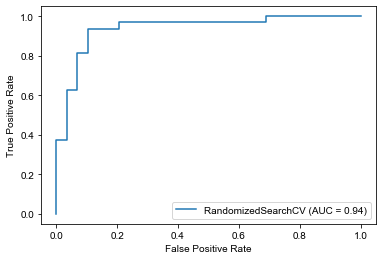

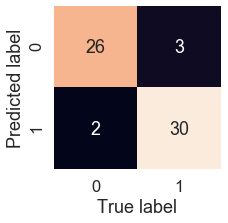

In [40]:
y_preds = grid_search_random_forest.predict(X_test)
plot_roc_curve(grid_search_random_forest,X_test,y_test)
print(confusion_matrix(y_test,y_preds))

sns.set(font_scale=1.5)
def plot_conf_mat(y_test,y_preds):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

plot_conf_mat(y_test,y_preds)

In [41]:
print(classification_report(y_test,y_preds)) #This just gives the scores only on one train test split. Hence it is better to do the cross validation


              precision    recall  f1-score   support

           0       0.93      0.90      0.91        29
           1       0.91      0.94      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



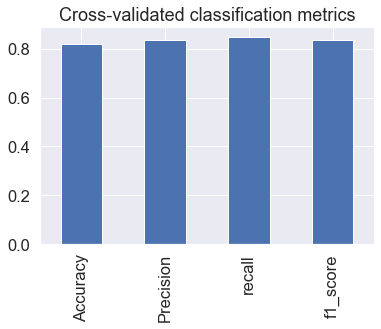

In [44]:
# new classfier with best parameters
clf = RandomForestClassifier()
cv_acc = cross_val_score(clf,X,y,cv=5,scoring="accuracy")

cv_pres = cross_val_score(clf,X,y,cv=5,scoring="precision")

cv_recall = cross_val_score(clf,X,y,cv=5,scoring="recall")

cv_f1_score = cross_val_score(clf,X,y,cv=5,scoring="f1")


cv_metrics = pd.DataFrame({"Accuracy":np.mean(cv_acc),
                           "Precision":np.mean(cv_pres),
                           "recall":np.mean(cv_recall),
                           "f1_score": np.mean(cv_f1_score)},index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",legend=False);

In [51]:
clf = RandomForestClassifier(oob_score= True,
                             n_estimators= 83,
                             min_samples_split= 12,
                             min_samples_leaf= 51,
                             max_depth= 10)
clf.fit(X_train,y_train);
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
ca,0.240964
thal,0.144578
cp,0.120482
oldpeak,0.115263
slope,0.084337
age,0.072289
thalach,0.072289
chol,0.064619
trestbps,0.043815
sex,0.029316


In [54]:
clf.feature_importances_

array([0.07228916, 0.02931551, 0.12048193, 0.04381476, 0.06461898,
       0.        , 0.        , 0.07228916, 0.01204819, 0.1152628 ,
       0.08433735, 0.24096386, 0.14457831])

In [55]:
feature_dict = dict(zip(heart_disease.columns,clf.feature_importances_))
feature_dict

{'age': 0.07228915662650603,
 'sex': 0.02931550901146221,
 'cp': 0.12048192771084339,
 'trestbps': 0.04381475587231356,
 'chol': 0.0646189790674455,
 'fbs': 0.0,
 'restecg': 0.0,
 'thalach': 0.07228915662650603,
 'exang': 0.01204819277108434,
 'oldpeak': 0.11526280424154986,
 'slope': 0.08433734939759037,
 'ca': 0.24096385542168677,
 'thal': 0.14457831325301207}

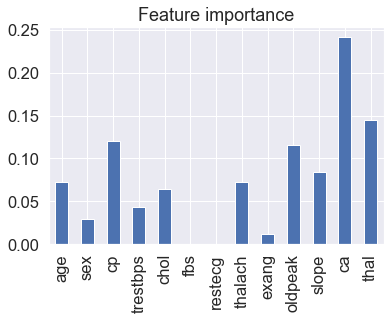

In [57]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature importance",legend=False)